<h3>Content</h3>

Daily price data for indexes tracking stock exchanges from all over the world (United States, China, Canada, Germany, Japan, and more). The data was all collected from Yahoo Finance, which had several decades of data available for most exchanges.<br><br>
Prices are quoted in terms of the national currency of where each exchange is located.
<h3>Acknowledgements</h3>

Data collected from Yahoo Finance

In [50]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [51]:
df = pd.read_csv('./indexData.csv')
df

Index        Date         Open         High          Low        Close  \
0        NYA  1965-12-31   528.690002   528.690002   528.690002   528.690002   
1        NYA  1966-01-03   527.210022   527.210022   527.210022   527.210022   
2        NYA  1966-01-04   527.840027   527.840027   527.840027   527.840027   
3        NYA  1966-01-05   531.119995   531.119995   531.119995   531.119995   
4        NYA  1966-01-06   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100  2021-05-27  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100  2021-05-28  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100  2021-05-31  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100  2021-06-01  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100  2021-06-02  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj Close       Volume  
0        528.690002          0.0  
1        527.210022          0.0  
2        527.840027          0.0  
3        531.119995          0.0  
4        532.070007          0.0  
...             ...          ...  
112452  1247.069946  379696400.0  
112453  1256.599976  160773400.0  
112454  1248.930054   91173700.0  
112455  1258.579956  155179900.0  
112456  1263.619995  148465000.0  

[112457 rows x 8 columns]

In [52]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [53]:
print("Linhas apagadas:")
print(df.shape[0] -df.dropna().shape[0])
df = df.dropna()
df

Linhas apagadas:
2204


Index        Date         Open         High          Low        Close  \
0        NYA  1965-12-31   528.690002   528.690002   528.690002   528.690002   
1        NYA  1966-01-03   527.210022   527.210022   527.210022   527.210022   
2        NYA  1966-01-04   527.840027   527.840027   527.840027   527.840027   
3        NYA  1966-01-05   531.119995   531.119995   531.119995   531.119995   
4        NYA  1966-01-06   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100  2021-05-27  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100  2021-05-28  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100  2021-05-31  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100  2021-06-01  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100  2021-06-02  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj Close       Volume  
0        528.690002          0.0  
1        527.210022          0.0  
2        527.840027          0.0  
3        531.119995          0.0  
4        532.070007          0.0  
...             ...          ...  
112452  1247.069946  379696400.0  
112453  1256.599976  160773400.0  
112454  1248.930054   91173700.0  
112455  1258.579956  155179900.0  
112456  1263.619995  148465000.0  

[110253 rows x 8 columns]

Intervalo para a criação dos gráficos.

In [54]:
#data inicial
dataIni='2019-1-1'
#data final
dataFim='2020-1-1'

Plot Sem cande e com Seaborn.

NYA



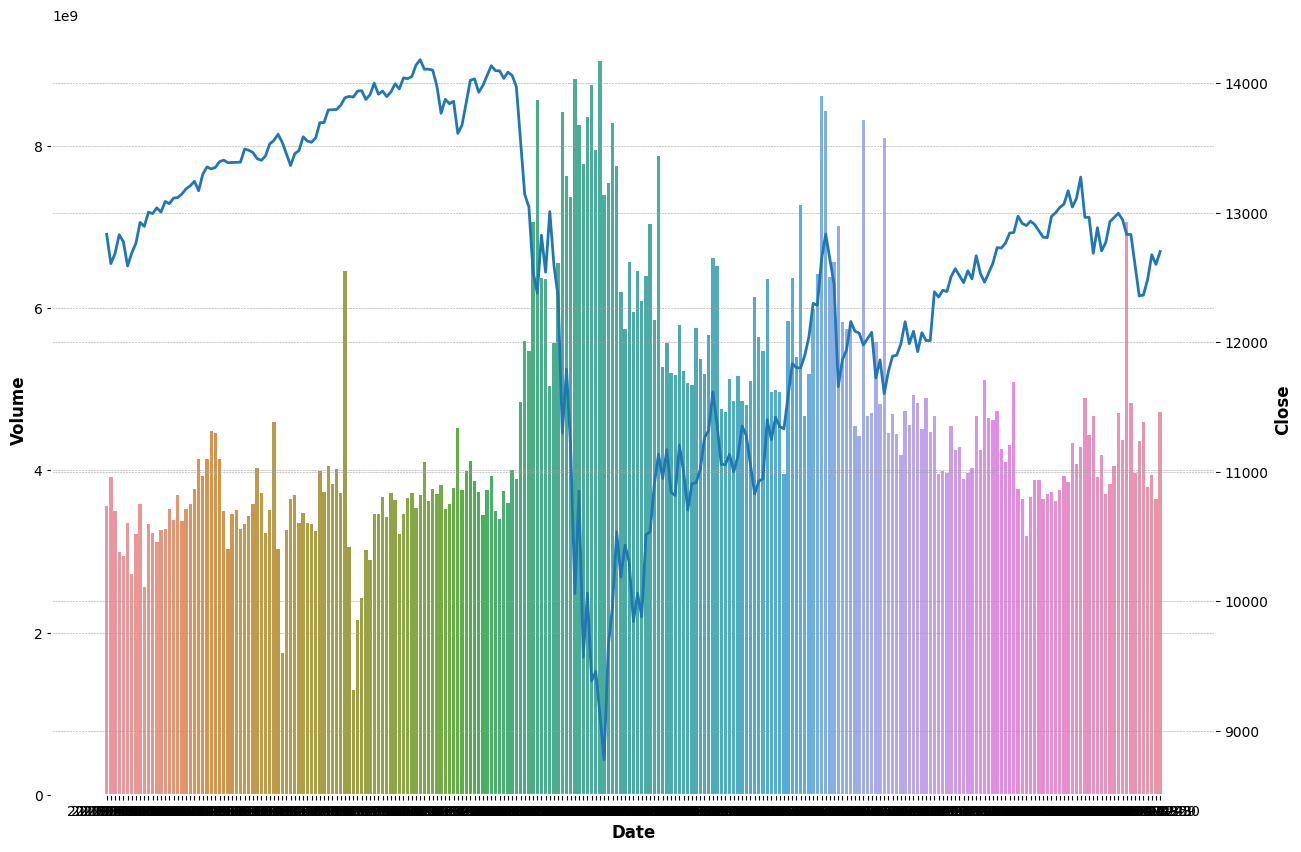

IXIC



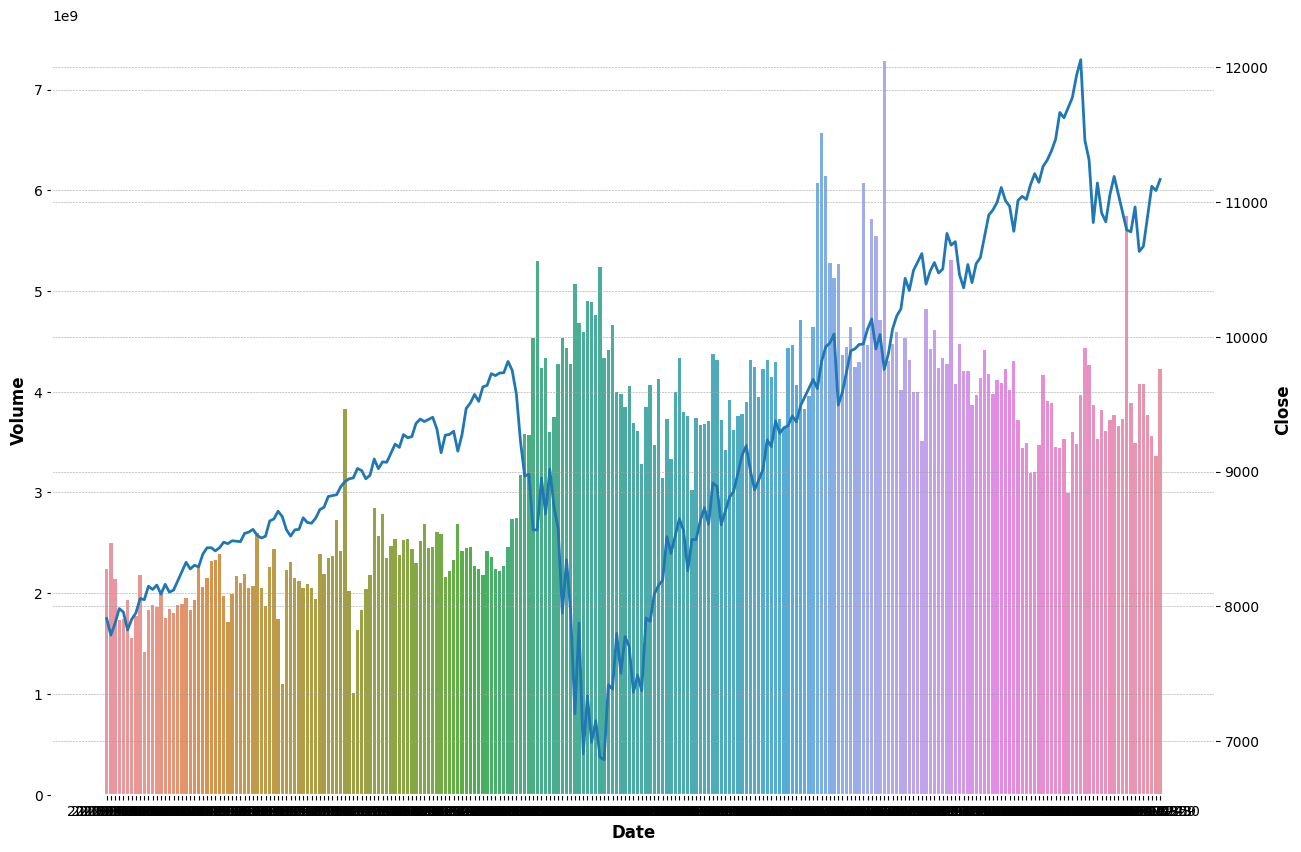

HSI



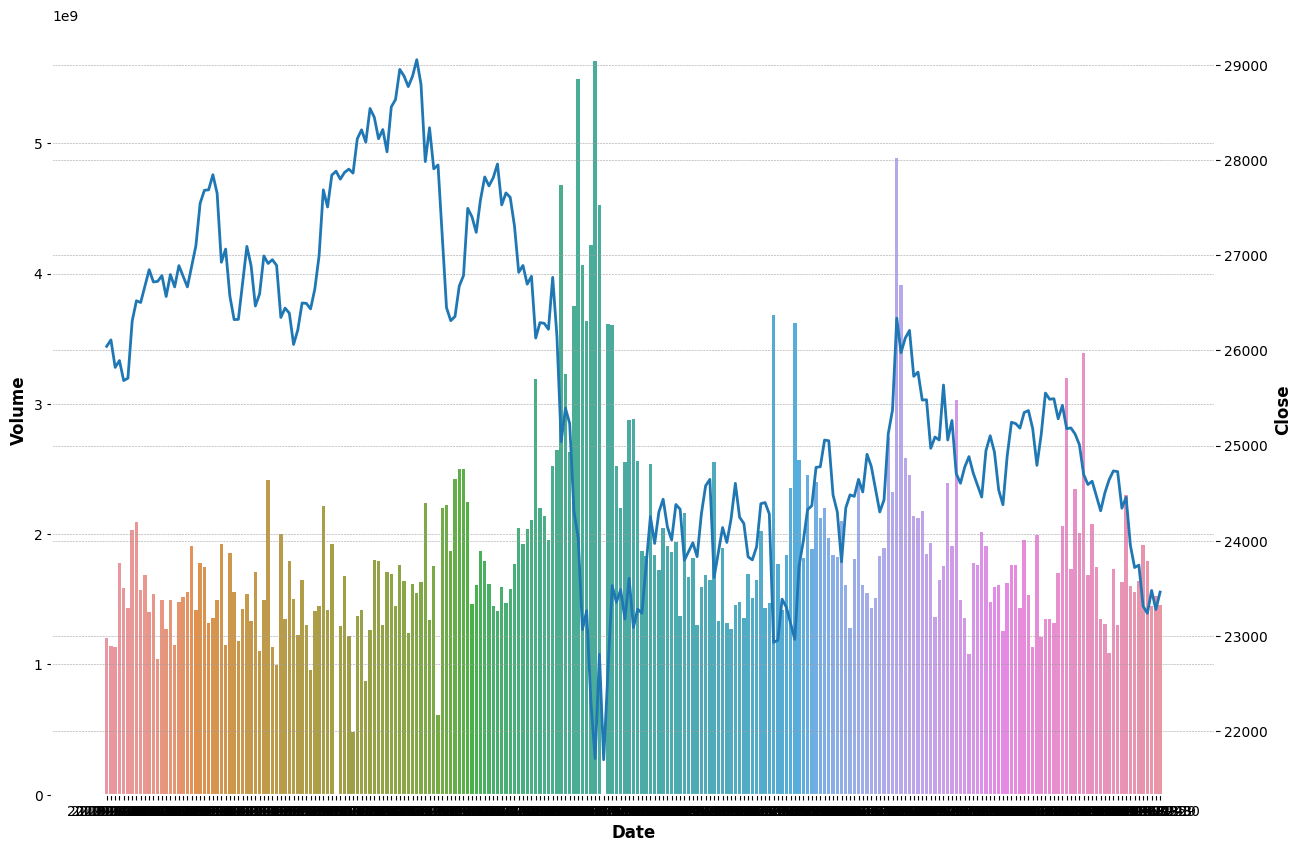

000001.SS



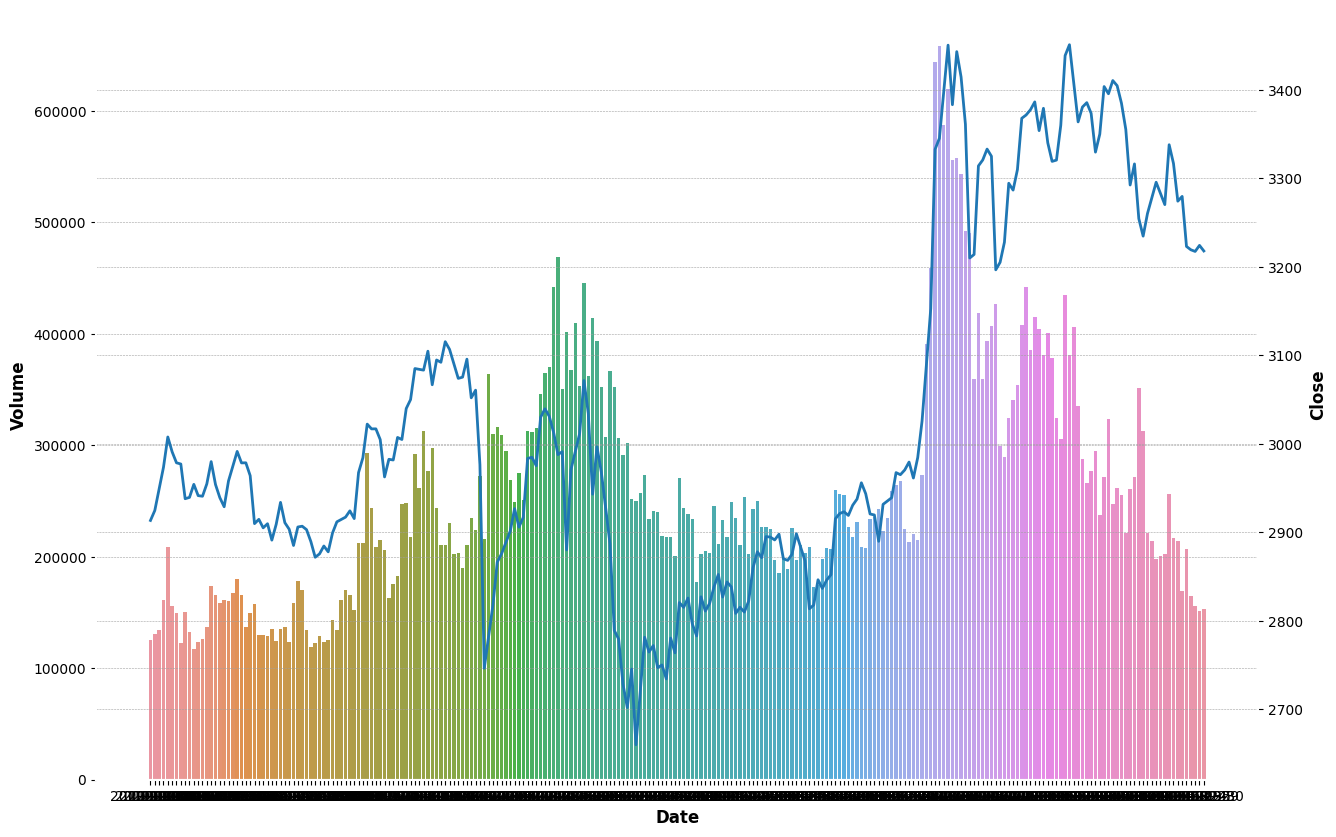

GSPTSE



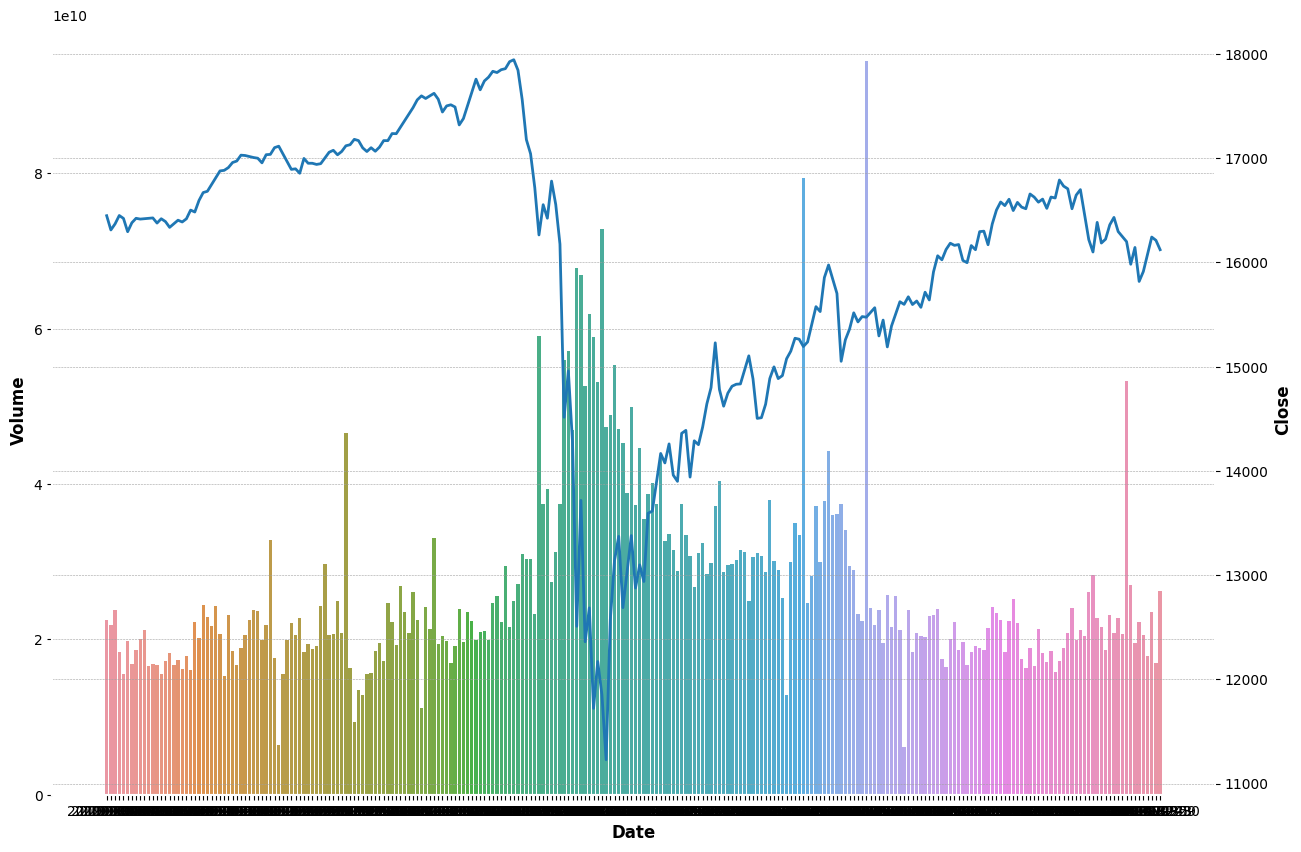

399001.SZ



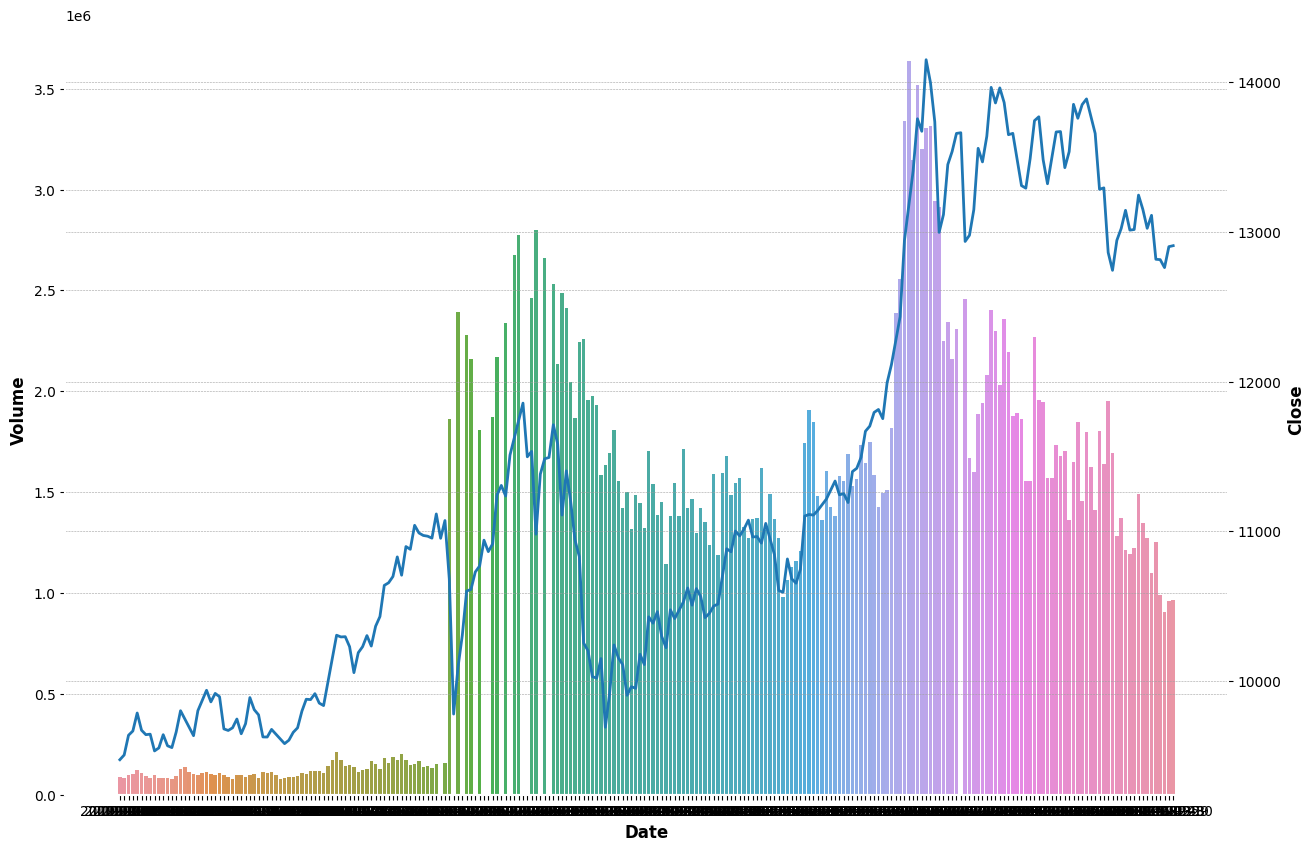

NSEI



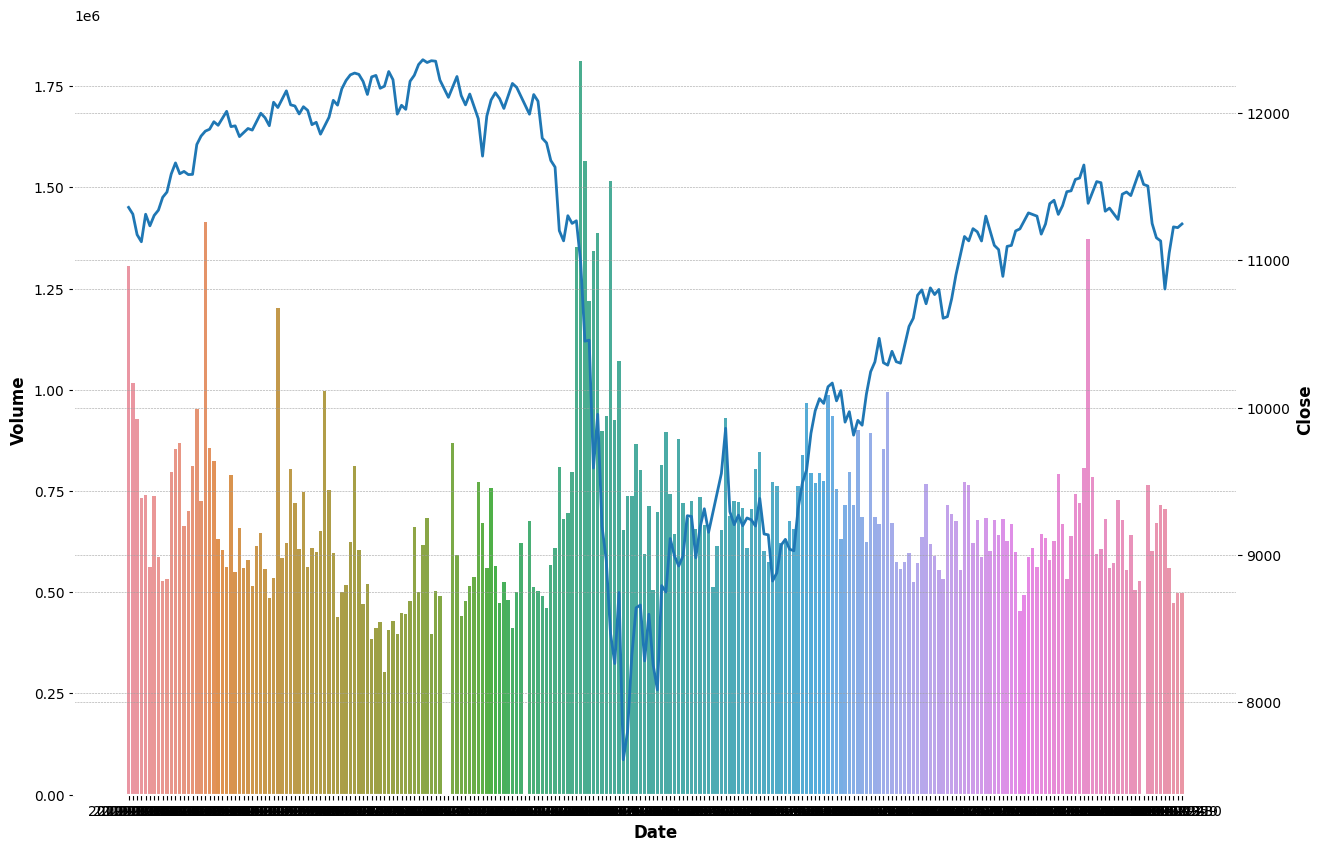

GDAXI



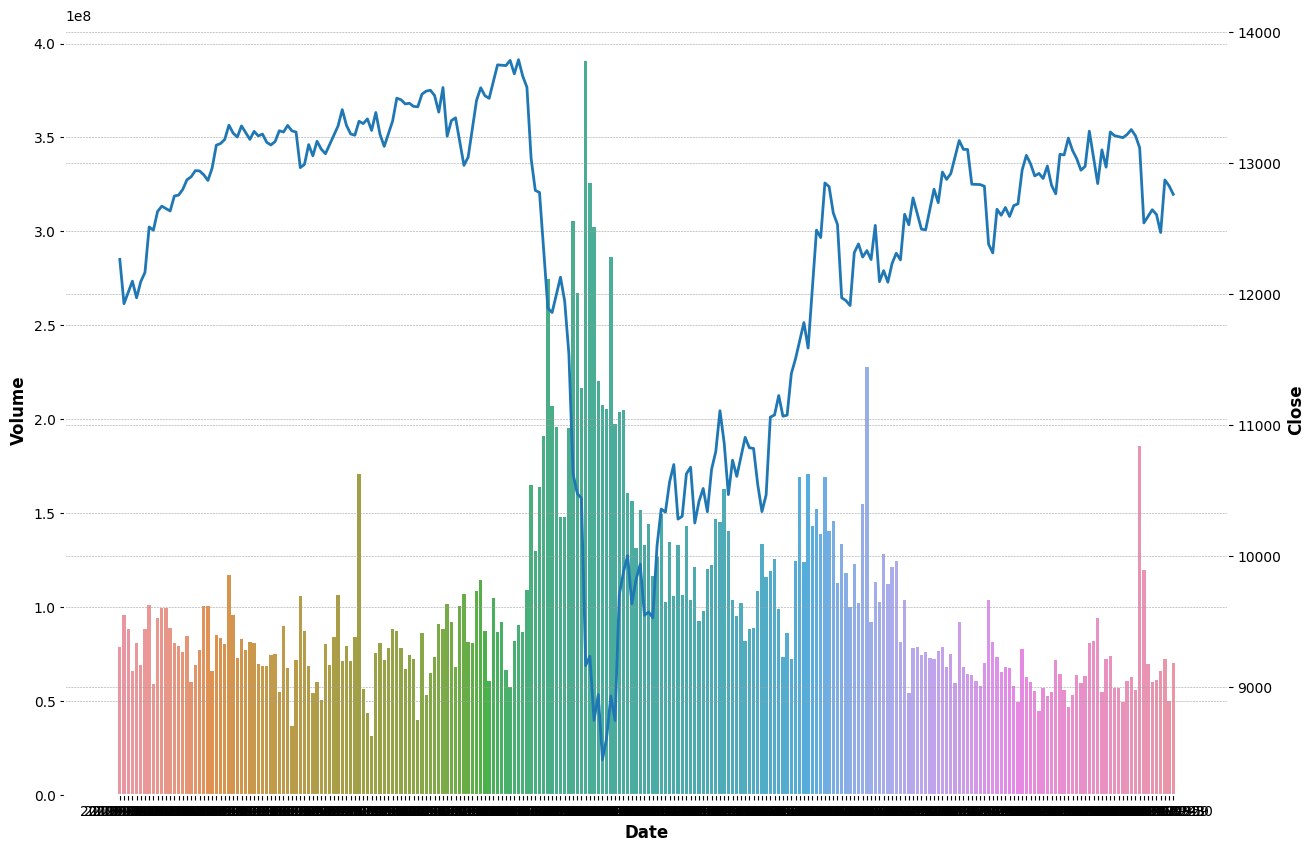

KS11



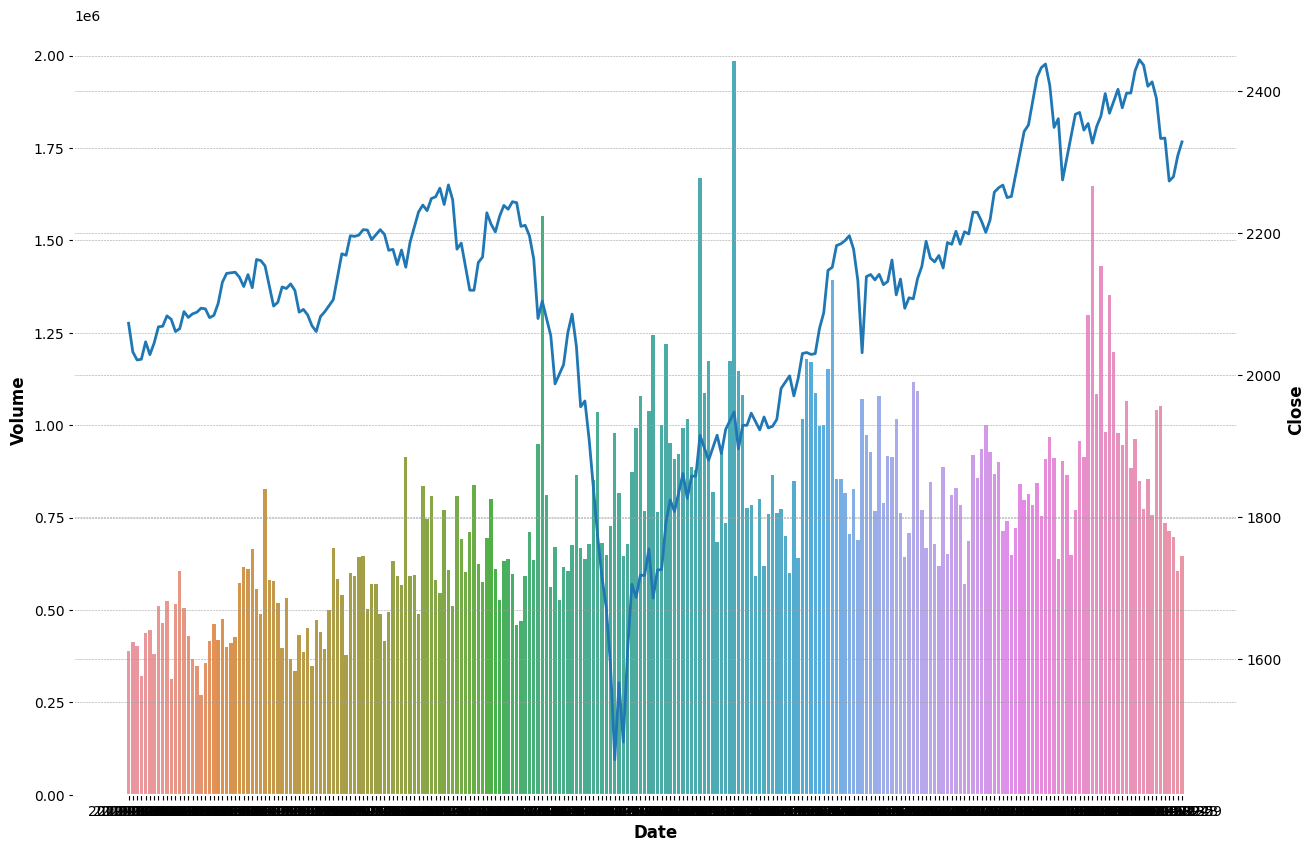

SSMI



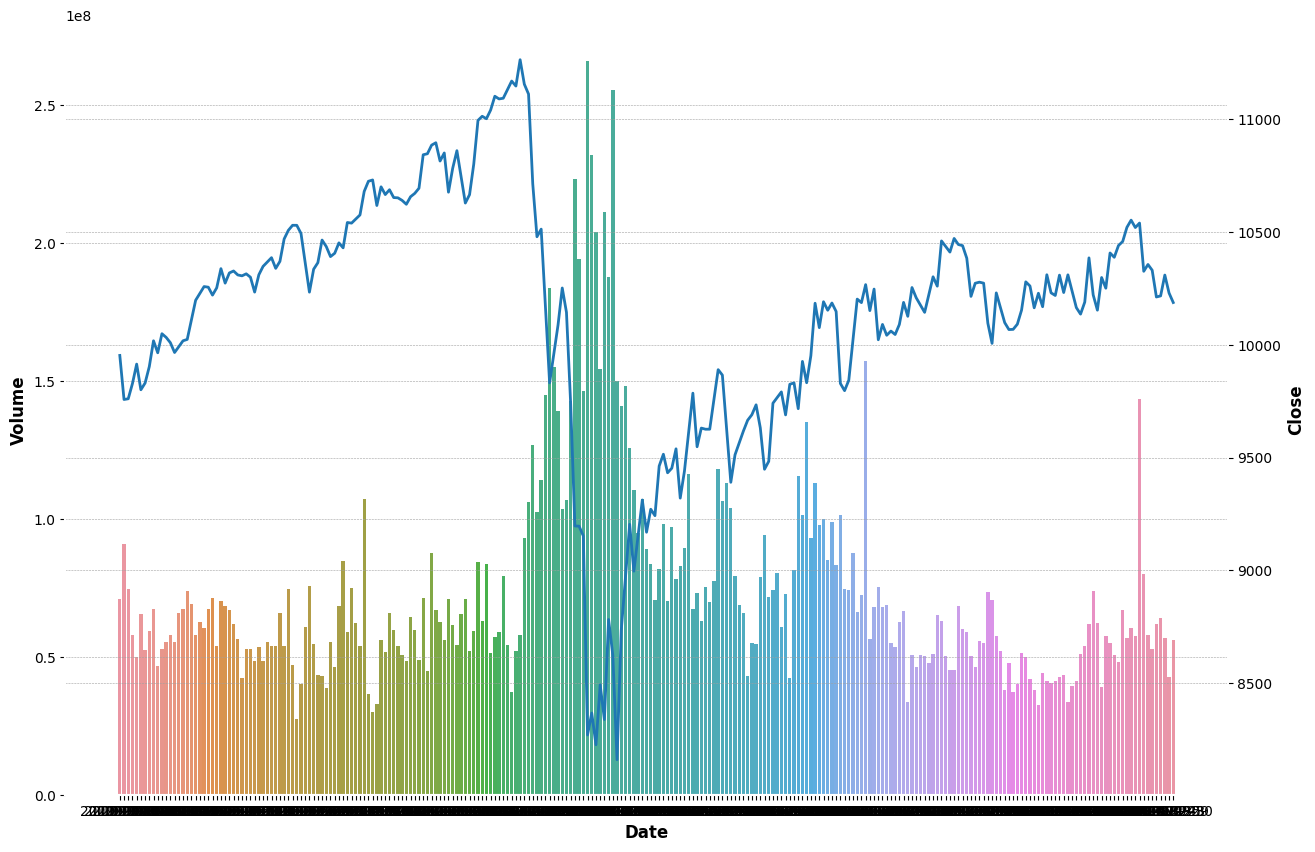

TWII



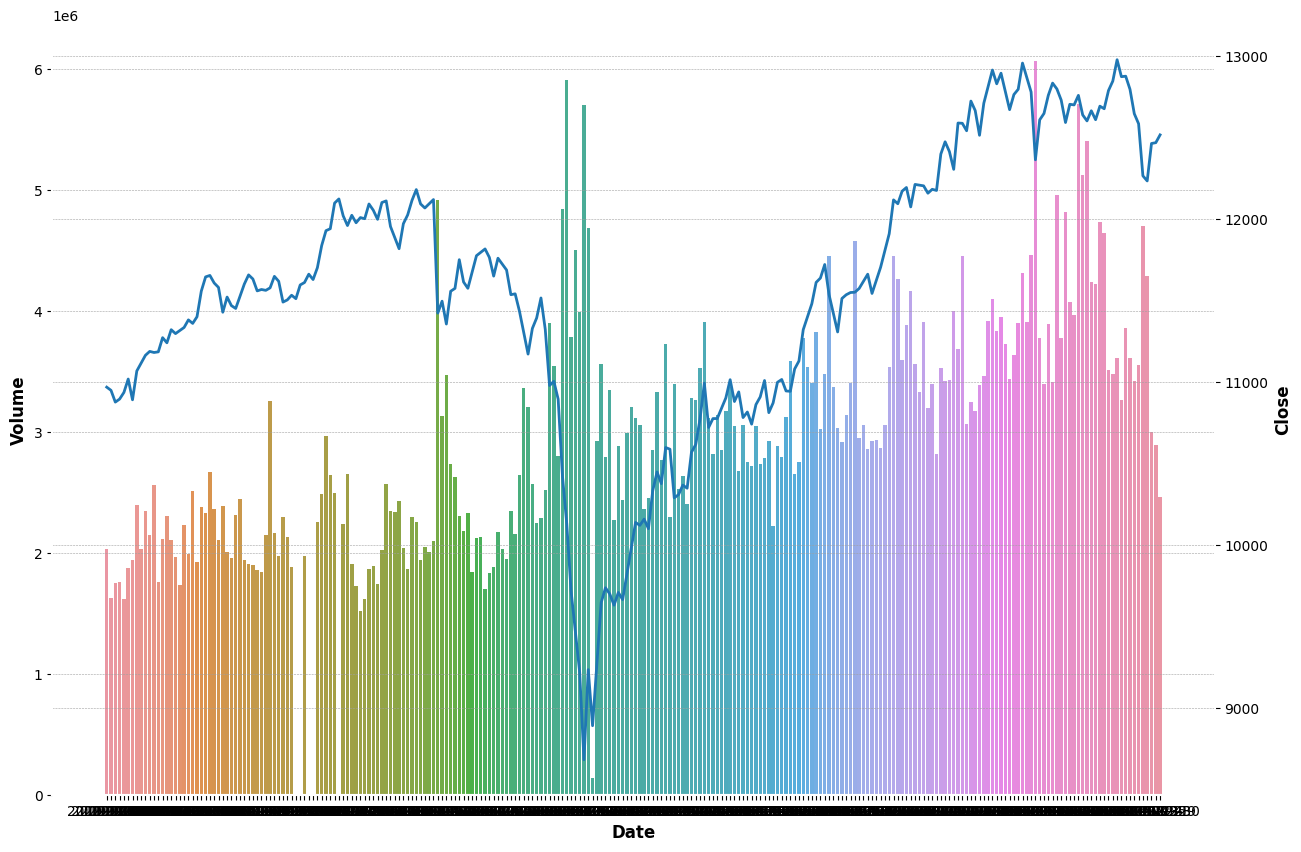

J203.JO



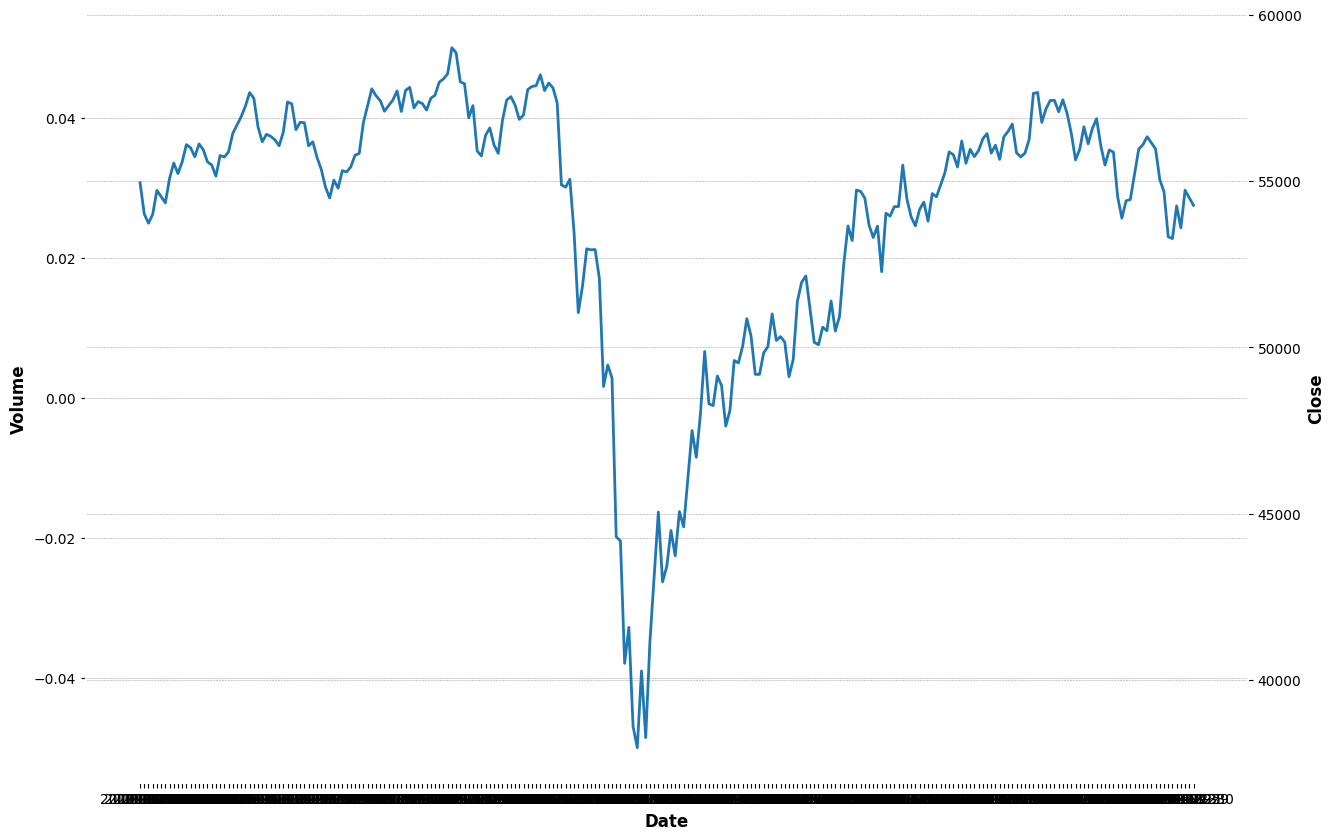

N225



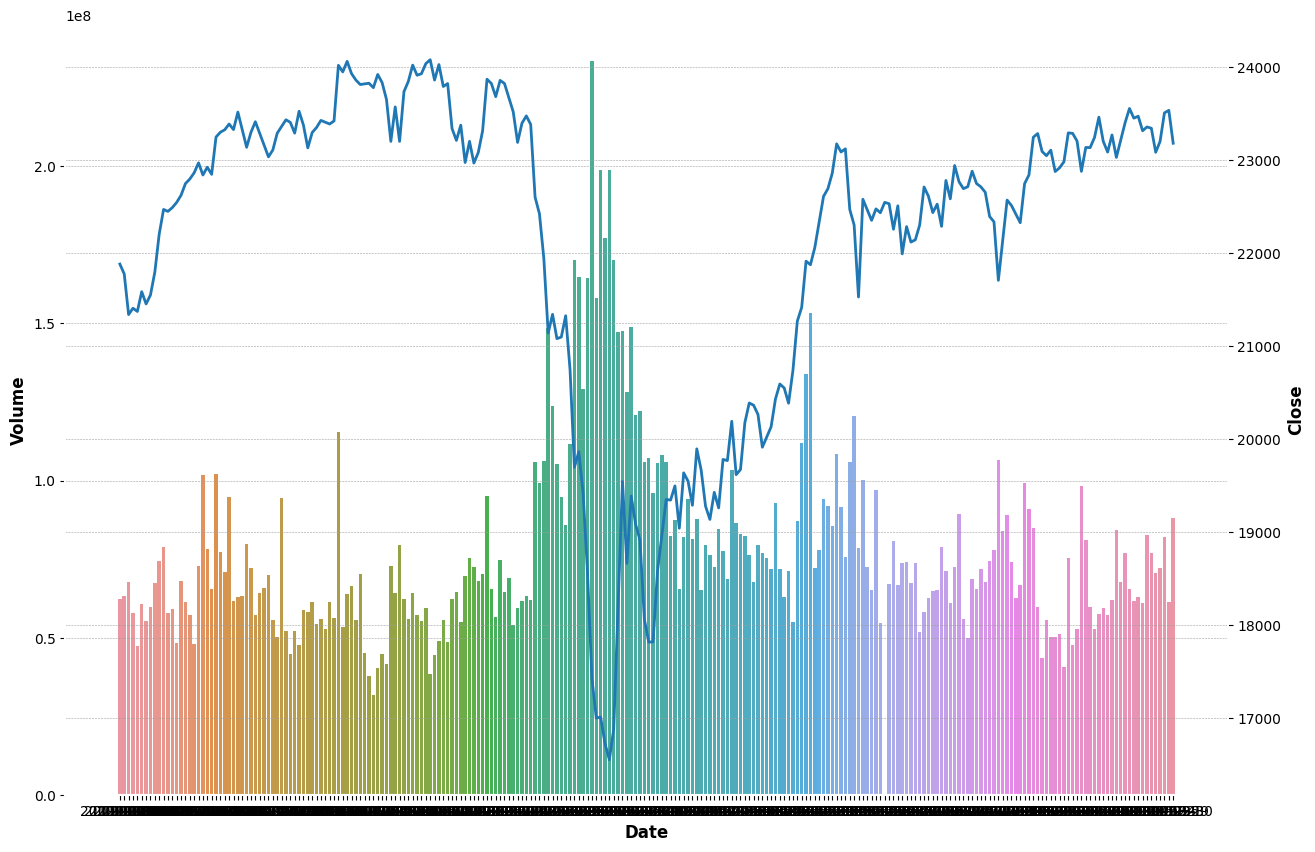

N100



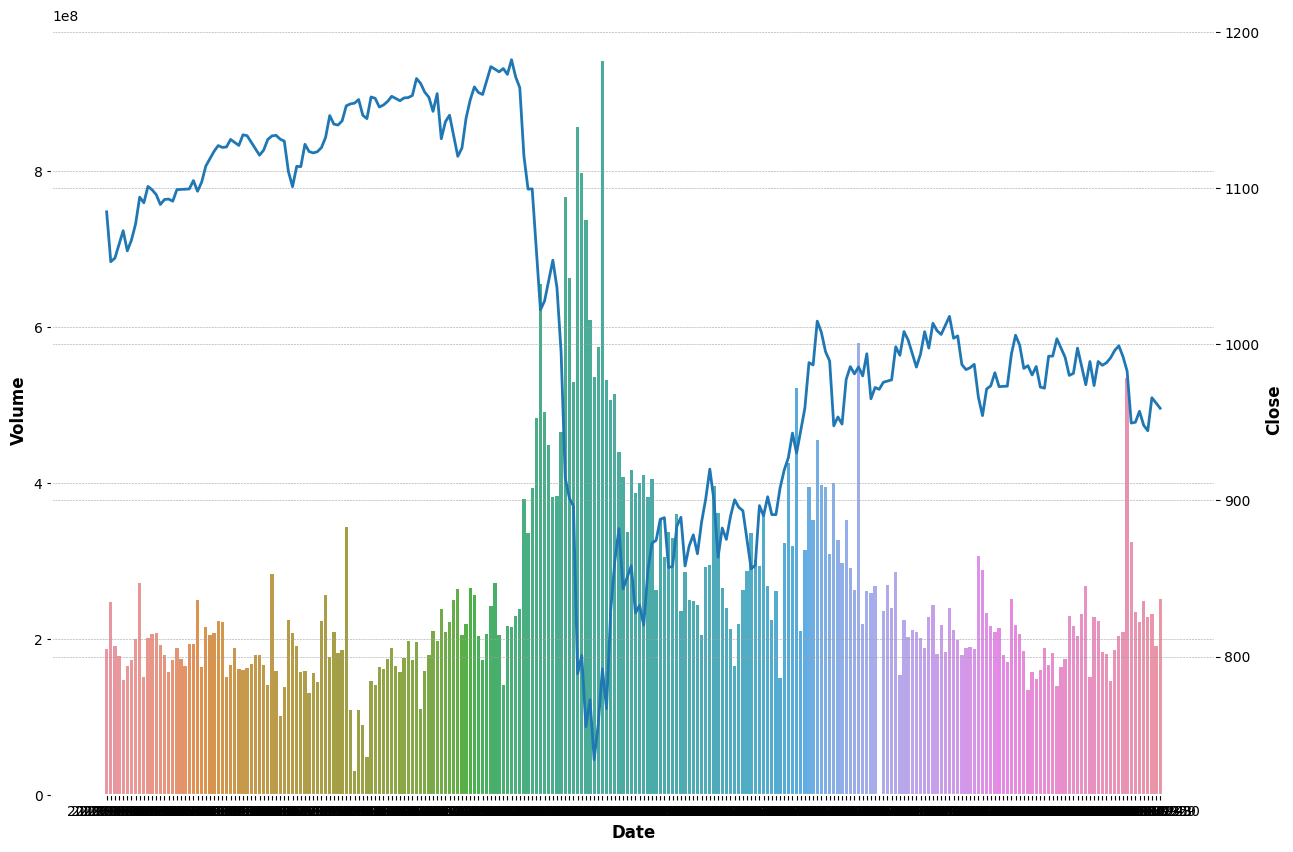

In [58]:
for i in  df['Index'].unique():
    dte = dte = df.loc[(df['Index']==i) & (df['Date'] >dataIni)& (df['Date'] <=dataFim) ] 
    print(i)
    print()
    fig, ax1 = plt.subplots(figsize=(15,10))

    sns.barplot(data=dte , x="Date", y="Volume",ax=ax1)
    ax2 = ax1.twinx()
    sns.lineplot(data=dte , x="Date", y="Close",ax=ax2)
    plt.show()


Plot Com candle.

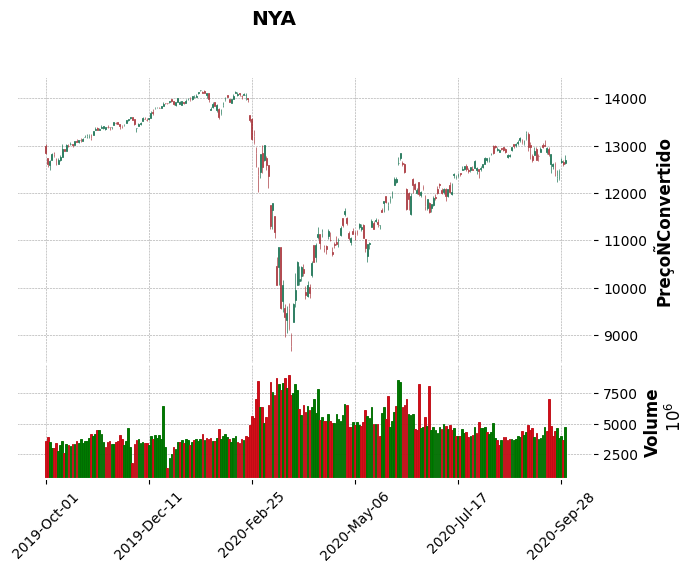

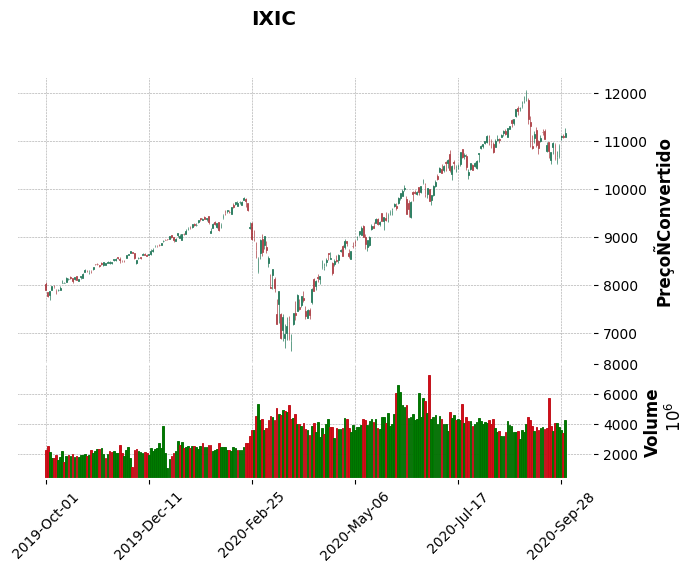

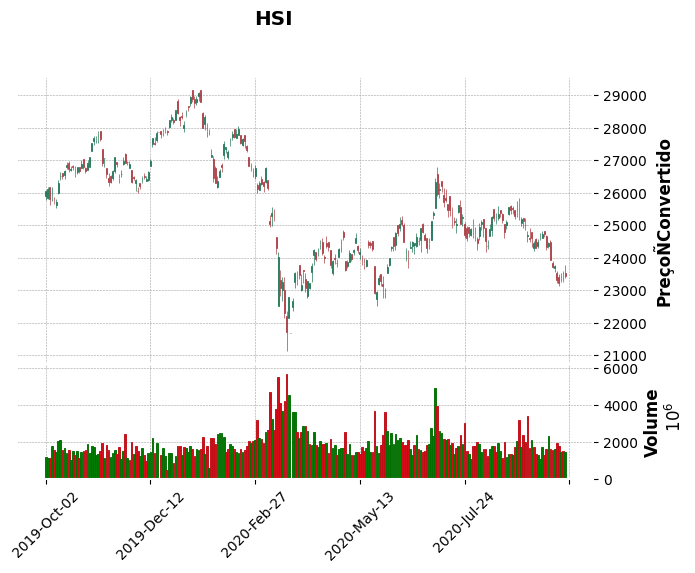

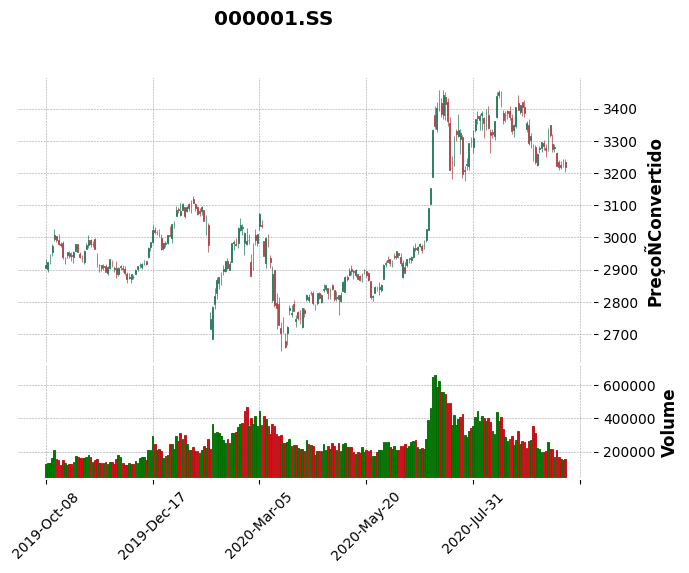

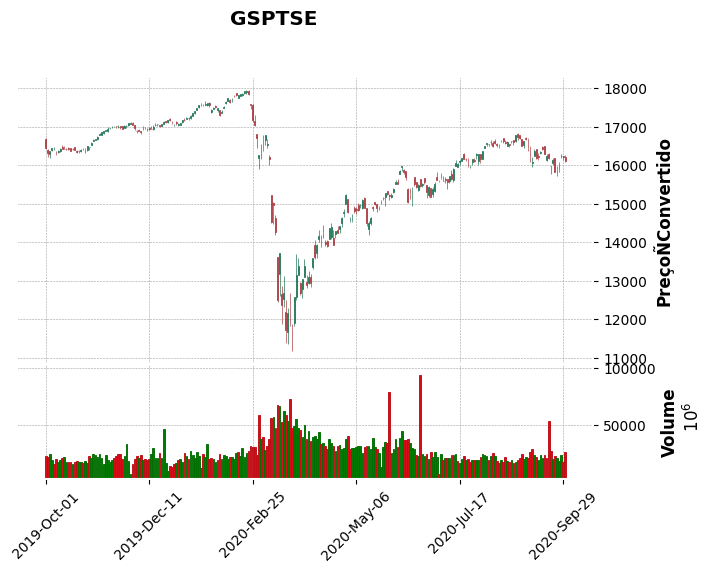

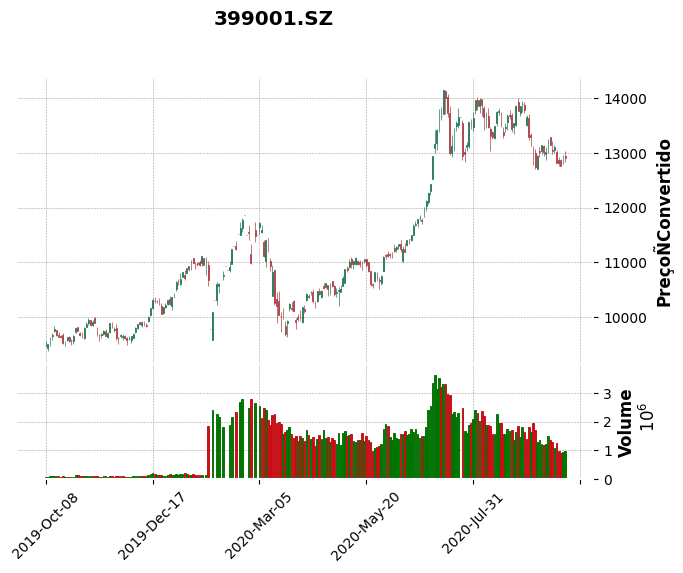

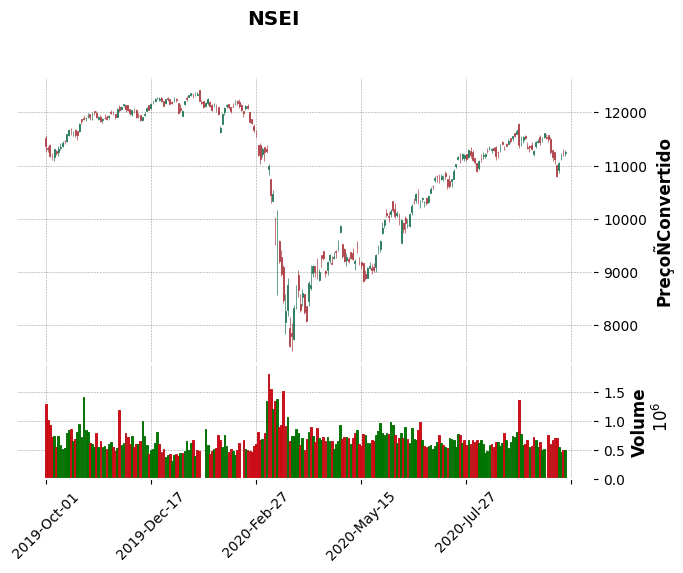

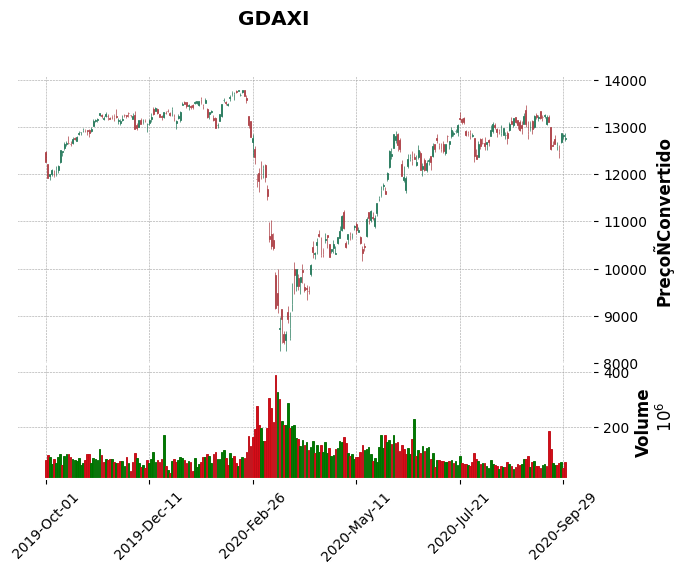

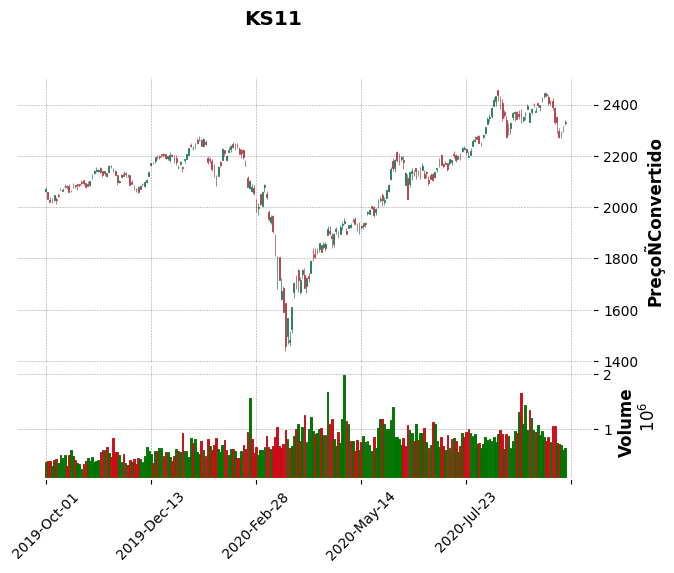

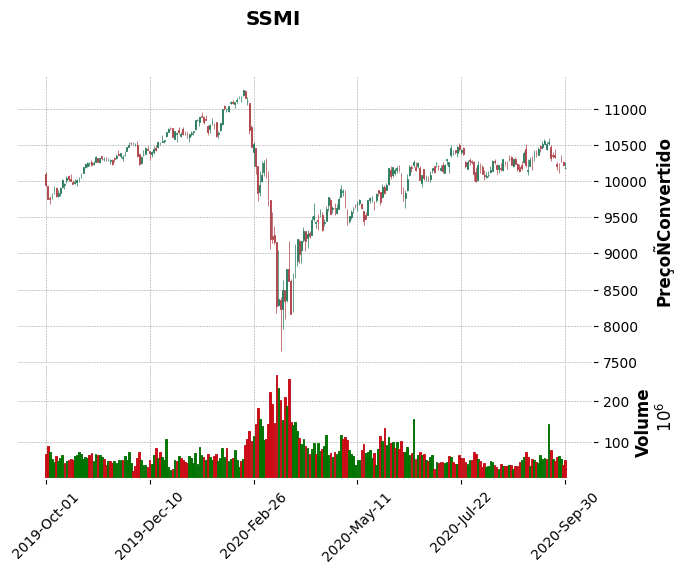

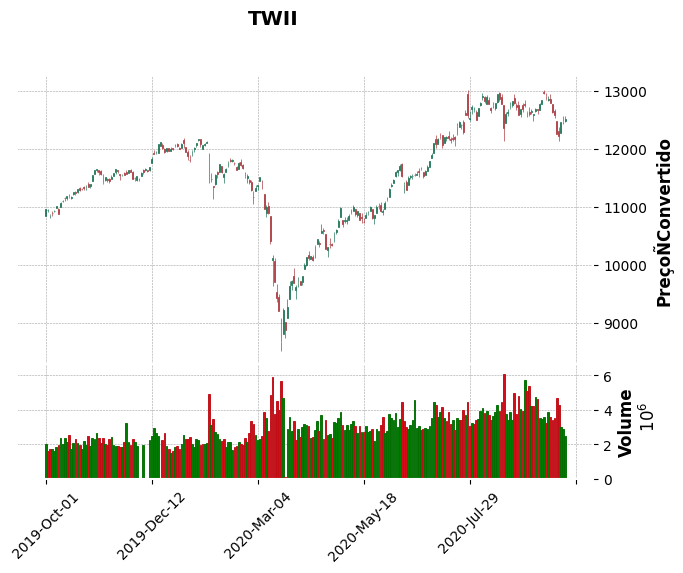

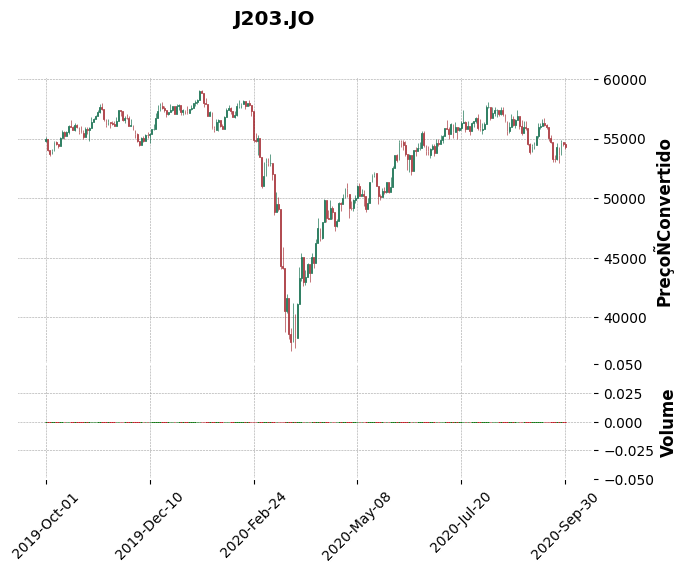

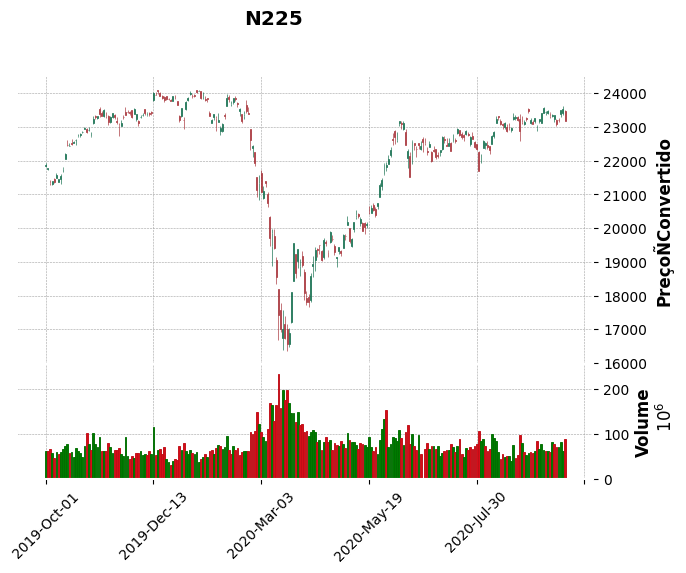

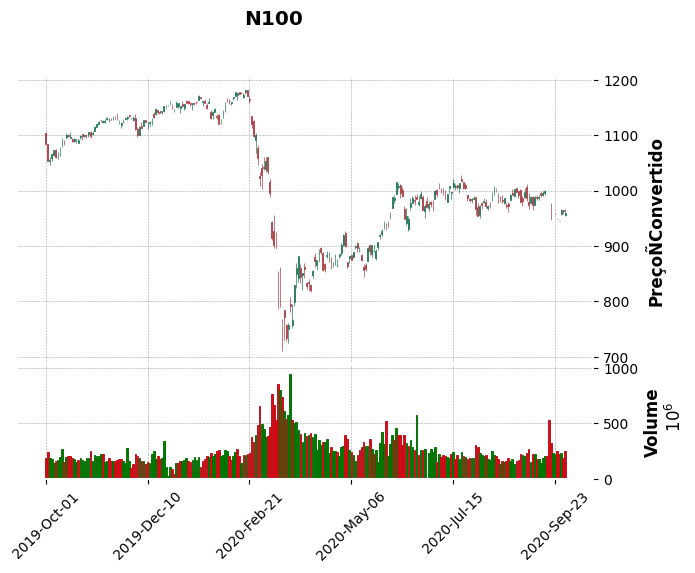

In [59]:

for i in  df['Index'].unique():
    dte = df.loc[(df['Index']==i) & (df['Date'] >dataIni)& (df['Date'] <=dataFim) ] 
    dte.index = pd.DatetimeIndex(dte['Date'])
    fplt.plot(
                dte,
                type='candle',
                style='charles',
                title=i,
                ylabel='PreçoÑConvertido',
                volume=True,
                ylabel_lower='Volume',
                )

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#muito pesado a imagem fica 
#fig = make_subplots(specs=[[{"secondary_y": True}]])


#fig.add_trace( go.Candlestick(
#                            x=dte['Date'],
 #                           open=dte['Open'],
  #                          high=dte['High'],
   #                         low=dte['Low'],
    #                        close=dte['Close'],
     #                       increasing_line_color= 'blue', 
      #                      decreasing_line_color= 'orange'
       #                     ),secondary_y=True)
#fig.add_trace(go.Bar(y=dte['Volume'],x=dte['Date']), secondary_y=False)
#fig.layout.yaxis2.showgrid=False

#fig.show()